In [5]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
df = pd.read_csv("/data/iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
X = df[["SepalLengthCm", "PetalLengthCm"]]

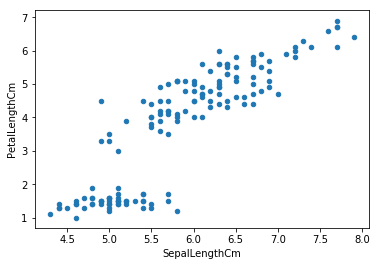

In [8]:
X.plot.scatter(0, 1)

In [10]:
from sklearn import preprocessing

In [9]:
K = 3

In [20]:
scaler = preprocessing.StandardScaler()
X_std = scaler.fit_transform(X.values)

In [13]:
X_std[:3]

array([[-0.90068117, -1.3412724 ],
       [-1.14301691, -1.3412724 ],
       [-1.38535265, -1.39813811]])

In [14]:
X_std.shape

(150, 2)

In [15]:
from sklearn import cluster

In [17]:
kmeans = cluster.KMeans(n_clusters=K)
kmeans.fit(X_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [21]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

In [22]:
centers

array([[5.00555556, 1.59814815],
       [6.85813953, 5.56744186],
       [5.87358491, 4.49245283]])

In [31]:
y = kmeans.predict(X_std)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2], dtype=int32)

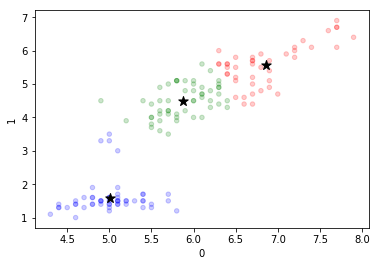

In [32]:

colors = pd.Series(y).apply(lambda v: ["blue", "red", "green"][v])
fig, ax = plt.subplots()
X.plot.scatter(0, 1, ax = ax, alpha = 0.2, color = colors)
pd.DataFrame(centers).plot.scatter(0, 1, ax = ax
                        , marker = "*", s = 100, color = "black")

In [33]:
kmeans.inertia_

43.03887066676178

In [37]:
import numpy as np
from sklearn import metrics

In [50]:
distances = np.zeros([len(y)])
for i in range(K):
    X_cluster = X_std[y == i]
    center = kmeans.cluster_centers_[i:i+1]
    d = metrics.euclidean_distances(X_cluster, center)
    distances[y == i] = d.flatten()
X.loc[:, "distance"] = distances
X.loc[:, "cluster"] = y

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [53]:
X.groupby("cluster").distance.agg(["mean", "count"])

,mean,count
cluster,,
0,0.402361,54
1,0.558198,43
2,0.435640,53


In [54]:
def get_outlier(y):
    q1, q3 = np.percentile(y, [25, 75])
    iqr = q3 - q1 # Inter quartile range
    upper_whisker = min(np.max(y), q3 + 1.5 * iqr)
    lower_whisker = max(np.min(y), q1 - 1.5 * iqr)
    outliers = (y > upper_whisker) | (y < lower_whisker)
    print("upper_whisker: ", upper_whisker, "lower whisker: ", lower_whisker)
    return outliers


In [55]:
X["anamoly"] = False

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [74]:
anamolies = np.array([False] * len(y))
for i in range(K):
    X_cluster = X[X.cluster == i]
    anamolies[X.cluster == i] = get_outlier(X_cluster.distance.values)
X.loc[X.index, "anamoly"] = anamolies
X[X.anamoly]

upper_whisker:  1.0815223936456582 lower whisker:  0.006813420341945165
upper_whisker:  1.1686278402639516 lower whisker:  0.08020923722228175
upper_whisker:  0.9556873038269658 lower whisker:  0.15323459060147918


,SepalLengthCm,PetalLengthCm,distance,cluster,anamoly
106,4.9,4.5,1.179680,2,True
117,7.7,6.7,1.206364,1,True
118,7.7,6.9,1.270726,1,True
122,7.7,6.7,1.206364,1,True
131,7.9,6.4,1.348258,1,True


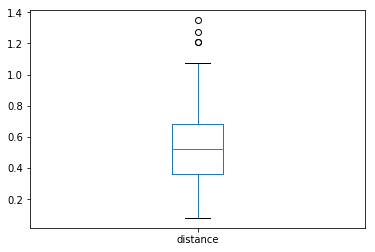

In [76]:
X[X.cluster == 1].distance.plot.box()

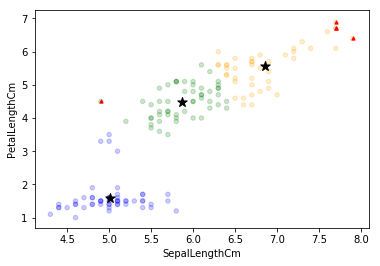

In [83]:
colors = pd.Series(y).apply(lambda v: ["blue", "orange", "green"][v])
fig, ax = plt.subplots()
X.plot.scatter(0, 1, ax = ax, alpha = 0.2, color = colors)
pd.DataFrame(centers).plot.scatter(0, 1, ax = ax
                        , marker = "*", s = 100, color = "black")
X[X.anamoly].plot.scatter(0,1, color = "red"
                          , ax = ax, marker = "^", s = 10)

In [84]:
metrics.homogeneity_score(df.Species, y)

0.5826296711195839

Text(0, 0.5, 'Inertia score')

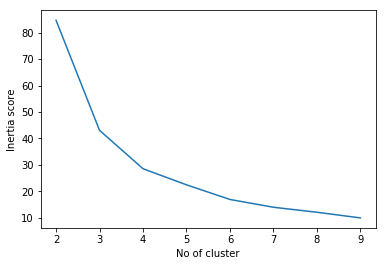

In [88]:
scores = {}
for k in range(2, 10):
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(X_std)
    scores[k] = kmeans.inertia_
    
pd.Series(scores).plot()
plt.xlabel("No of cluster")
plt.ylabel("Inertia score")